In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import numpy as np
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt

In [2]:
transform = torchvision.transforms.Compose([
    torchvision.transforms.RandomRotation(10),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize((0.1307,), (0.3081,))
])
mnist_train = torchvision.datasets.MNIST('./data', train=True, download=True, transform=transform)
mnist_test = torchvision.datasets.MNIST('./data', train=False, download=True, transform=transform)

100.0%


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw


100.0%


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw




100.0%
100.0%


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw

Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw



In [3]:
mnist_train.__len__()

60000

In [4]:
mnist_test.__len__()

10000

In [5]:
mnist_train.data[0].shape

torch.Size([28, 28])

In [6]:
mnist_train.data[0][:10][:10]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

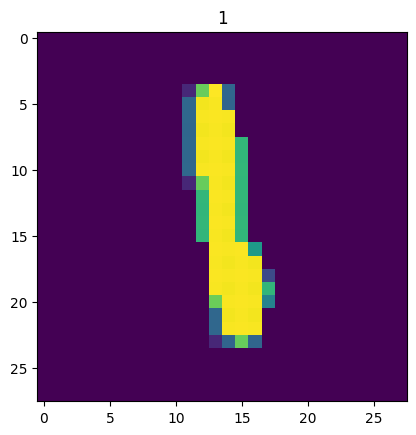

In [7]:
plt.imshow(mnist_train.data[200].numpy())
plt.title(mnist_train.targets[200].numpy())
plt.show()

In [8]:
train_loader = torch.utils.data.DataLoader(mnist_train, batch_size=1024, shuffle=True)
test_loader = torch.utils.data.DataLoader(mnist_test, batch_size=1024, shuffle=False)

In [9]:
for x,y in train_loader:
    print(x.shape, y.shape)
    print(x[0][0][:5][:5])
    break

torch.Size([1024, 1, 28, 28]) torch.Size([1024])
tensor([[-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
         -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
         -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
         -0.4242, -0.4242, -0.4242, -0.4242],
        [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
         -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
         -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
         -0.4242, -0.4242, -0.4242, -0.4242],
        [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
         -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
         -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
         -0.4242, -0.4242, -0.4242, -0.4242],
        [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
   

In [10]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x,dim=0)

In [11]:
net = Net()
x = torch.rand((32,1,28,28))
print(x.shape)
out = net(x)
print(out.shape, out[0])

torch.Size([32, 1, 28, 28])
torch.Size([32, 10]) tensor([-3.4222, -3.4462, -3.4957, -3.5017, -3.5041, -3.4430, -3.4764, -3.4463,
        -3.4410, -3.5086], grad_fn=<SelectBackward0>)


In [12]:
for x,y in train_loader:
    out = net(x)
    print(out[0], out[0].argmax(),y[0])
    break

tensor([-6.9257, -6.5597, -6.9950, -6.8481, -7.1083, -7.3298, -7.0725, -6.5759,
        -7.1146, -6.9952], grad_fn=<SelectBackward0>) tensor(1) tensor(7)


In [13]:
def train(net, train_loader, test_loader, optimizer, loss_fn, epochs, eval_in=5):
    for e in range(epochs):
        if e%eval_in == 0:
            eval(test_loader)
        else:
            for x,y in train_loader:
                preds = net(x)
                print(preds.shape, preds[0])
                loss = loss_fn(preds, y)
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
                print('loss ',loss)
                print('fc2 ',net.fc2.weight.grad[0][0])
                print('fc1 ',net.fc1.weight.grad[0][0])
                break

def eval(test_loader):
    pass


In [14]:
optimizer = torch.optim.SGD(net.parameters(),lr = 0.01)
loss_fn = torch.nn.CrossEntropyLoss()
train(net, train_loader, test_loader, optimizer,loss_fn, epochs=2)

torch.Size([1024, 10]) tensor([-6.8662, -6.9712, -6.9522, -7.0109, -6.9861, -7.0511, -7.0160, -6.8983,
        -6.8844, -6.7517], grad_fn=<SelectBackward0>)
loss  tensor(2.3070, grad_fn=<NllLossBackward0>)
fc2  tensor(0.0009)
fc1  tensor(-0.0006)


In [15]:
def train(net, train_loader, test_loader, optimizer, loss_fn, epochs, eval_in=5):
    for e in range(epochs):
        if e%eval_in == 0:
            eval(test_loader, loss_fn)
        else:
            for x, y in train_loader:
                print(x.shape)
                preds = net(x)
                print(preds.shape, preds[0])
                break
def eval(test_loader, loss_fn):
    pass


In [16]:
optimizer = torch.optim.SGD(net.parameters(),lr = 0.01, momentum=0.5)
loss_fn = torch.nn.CrossEntropyLoss()
train(net, train_loader, test_loader, optimizer,loss_fn, epochs=3)

torch.Size([1024, 1, 28, 28])
torch.Size([1024, 10]) tensor([-6.9723, -6.7182, -6.8696, -6.9105, -6.9853, -7.2489, -7.1120, -6.6796,
        -6.7138, -6.8059], grad_fn=<SelectBackward0>)
torch.Size([1024, 1, 28, 28])
torch.Size([1024, 10]) tensor([-6.8516, -7.1411, -6.6856, -6.8504, -7.0298, -6.6414, -6.9096, -6.9715,
        -6.9552, -6.8083], grad_fn=<SelectBackward0>)


In [17]:
# accuracncy bodoh 
def train(net, train_loader, test_loader, optimizer, loss_fn, epochs, NN=False):
    for e in range(epochs):
        net.train()
        correct = 0
        for x, y in train_loader:
            optimizer.zero_grad()
            if NN:
                x = x.flatten(start_dim=1, end_dim=-1)
            preds = net(x)
            loss = loss_fn(preds, y)
            loss.backward()
            optimizer.step()      
            preds = preds.data.max(1, keepdim=True)[1]
            correct += preds.eq(y.data.view_as(preds)).sum()
        print('Epoch: ', e, 'Train Acc: ', correct.item()*100/len(mnist_train))
        eval(test_loader, NN=NN)
def eval(test_loader, NN):
            net.eval()
            correct = 0
            for x, y in test_loader:
                if NN:
                    x = x.flatten(start_dim=1, end_dim=-1)
                preds = net(x)
                preds = preds.data.max(1, keepdim=True)[1]
                correct += preds.eq(y.data.view_as(preds)).sum()
            print('Test Acc: ', correct.item()*100/len(mnist_test))

In [18]:
optimizer = torch.optim.SGD(net.parameters(),lr = 0.01, momentum=0.5)
loss_fn = torch.nn.CrossEntropyLoss()
train(net, train_loader, test_loader, optimizer,loss_fn, epochs=10, NN=False)

Epoch:  0 Train Acc:  13.541666666666666
Test Acc:  48.61
Epoch:  1 Train Acc:  22.976666666666667
Test Acc:  67.91
Epoch:  2 Train Acc:  38.25833333333333
Test Acc:  77.97
Epoch:  3 Train Acc:  52.07833333333333
Test Acc:  82.36
Epoch:  4 Train Acc:  59.565
Test Acc:  84.6
Epoch:  5 Train Acc:  63.968333333333334
Test Acc:  86.64
Epoch:  6 Train Acc:  67.88333333333334
Test Acc:  88.18
Epoch:  7 Train Acc:  70.83333333333333
Test Acc:  89.08
Epoch:  8 Train Acc:  73.025
Test Acc:  89.92
Epoch:  9 Train Acc:  75.03
Test Acc:  90.67


In [19]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(784, 20)
        self.fc2 = nn.Linear(20, 15)
        self.fc3 = nn.Linear(15, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = F.dropout(x, training=self.training)
        x = self.fc3(x)
        return F.log_softmax(x,dim=0)

In [20]:
net = Net()
optimizer = torch.optim.SGD(net.parameters(),lr = 0.01, momentum=0.5)
loss_fn = torch.nn.CrossEntropyLoss()
train(net, train_loader, test_loader, optimizer,loss_fn, epochs=10, NN=True)

Epoch:  0 Train Acc:  21.731666666666666
Test Acc:  56.61
Epoch:  1 Train Acc:  35.516666666666666
Test Acc:  70.64
Epoch:  2 Train Acc:  42.27166666666667
Test Acc:  77.56
Epoch:  3 Train Acc:  46.971666666666664
Test Acc:  80.85
Epoch:  4 Train Acc:  50.458333333333336
Test Acc:  82.39
Epoch:  5 Train Acc:  52.91
Test Acc:  83.17
Epoch:  6 Train Acc:  54.915
Test Acc:  84.47
Epoch:  7 Train Acc:  57.013333333333335
Test Acc:  84.75
Epoch:  8 Train Acc:  58.41833333333334
Test Acc:  85.47
Epoch:  9 Train Acc:  59.21
Test Acc:  86.11
